In [12]:
"""
Exercicio
achar os parâmetros de uma curva dado um conjunto de dados usando algoritmos evolutivos e/ou PSO

y = a + b*x + c*x^2

onde a, b e c são os parâmetros a serem encontrados

dado o conjunto de dados x_data e y_data, encontrar os parâmetros a, b e c da curva y = a + b*x + c*x^2
de forma a minimizar o erro quadrático médio
"""
a_max, a_min = 5, -5
b_max, b_min = 5, -5
c_max, c_min = 5, -5

def func(x, a, b, c):
    return a + b*x + c*x**2

In [6]:
with open('x_data.txt') as f:
    x_data = f.readlines()

x_data = [float(x.strip()) for x in x_data]

with open('y_data.txt') as f:
    y_data = f.readlines()

y_data = [float(y.strip()) for y in y_data]

In [10]:
import numpy as np

def func_obj(params):
    a, b, c = params
    y_pred = [func(x, a, b, c) for x in x_data]
    return np.mean((np.array(y_data) - np.array(y_pred))**2)

In [33]:
from sko.GA import GA

ga = GA(func_obj, n_dim=3, size_pop=50, max_iter=500, lb=[a_min, b_min, c_min], ub=[a_max, b_max, c_max])
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Best Error: {best_y_ga}')

best_x: [-0.78148079  3.41851501 -1.04505365]
 GA Best Error: [0.28195512]


In [34]:
import plotly.graph_objects as go
history_ga_best = [y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=1-Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='GA Convergence Curve')
fig.show('svg')

In [32]:
from sko.DE import DE

de = DE(func=func_obj, n_dim=3, size_pop=50, max_iter=500, lb=[a_min, b_min, c_min], ub=[a_max, b_max, c_max])

best_x_de, best_y_de = de.run()
print(f'best_x_de: {best_x_de}\n DE Best Error: {best_y_de}')

best_x_de: [ 0.49795951  1.02455502 -0.29476564]
 DE Best Error: [3.07873925e-07]


In [35]:
import plotly.graph_objects as go
history_de_best = [y.min() for y in de.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_de_best))), y=history_de_best, name='Best DE', mode='lines'))
for i, Y in enumerate(de.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=1-Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='DE Convergence Curve')
fig.show('svg')

In [27]:
from sko.PSO import PSO

pso = PSO(func_obj, dim=3, pop=40, max_iter=100, lb=[a_min, b_min, c_min], ub=[a_max, b_max, c_max])
pso.run()
print(f'best_x: {pso.gbest_x}\n PSO Training Accuracy: {pso.gbest_y}')

best_x: [ 0.49863385  1.02238688 -0.29405422]
 PSO Training Accuracy: [7.93351216e-08]


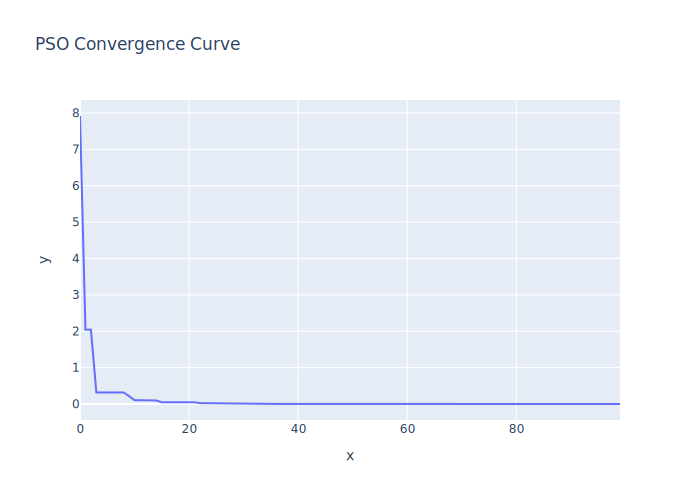

In [36]:
import plotly.express as px

pso_best_hist = [y[0] for y in pso.gbest_y_hist]

fig = px.line(x=list(range(len(pso_best_hist))), y=pso_best_hist, title='PSO Convergence Curve')
fig.show('svg')